In [ ]:
# Seattle vs Vancouver Weather Analysis
# Jack Neton
# DATA 5300
# Oct 2, 2025

# Introduction

The purpose of this project is to determine if Seattle or Vancouver sees more precipitation, on average. It seeks to solve this question for NCAA recruiting purposes. Often, PNW and Canadian athletes choose between an intercollegiate athletics opportunity in Seattle or Vancouver. Surprisingly, whether or not it rains more in a particular city can be a deicding factor.

All data are from the NOAA Climate data Online Search tool: https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND

# Getting Started

In [1]:
# Import libraries
import pandas as pd # Import and work with data sets
import numpy as np # Numerical computation


# Import Data Visalization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set_style("whitegrid")

In [2]:
# Load the data
# Load the Seattle data set
df_seattle = pd.read_csv('/Users/jackneton/Desktop/Grad School/DATA 5100/weather/data/seattle_rain.csv')
    
type(df_seattle)

pandas.core.frame.DataFrame

I am reading this data in locally from my desktop.

In [3]:
# Load the Vancouver dat set
df_van = pd.read_csv('/Users/jackneton/Desktop/Grad School/DATA 5100/weather/data/vancouver_rain.csv')

type(df_van)

pandas.core.frame.DataFrame

I am reading this data in locally from my desktop.

# Exploring the data sets

In [4]:
# Explore data sets
# We are primarily interested in the date and precipitation

df_seattle.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/6/18,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/7/18,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/8/18,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/12/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/13/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [5]:
# Explore Vancouver data set

df_van.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-01,0.00,0.0,0.0
1,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-02,0.00,0.0,0.0
2,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-03,0.00,0.0,0.0
3,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-04,0.00,0.0,NaN
4,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-05,1.42,0.0,0.0
5,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-06,0.20,0.0,0.0
6,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-07,1.02,0.0,0.0
7,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-08,0.26,0.0,0.0
8,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-09,0.05,0.0,NaN
9,CA001105669,"N VANCOUVER WHARVES, BC CA",2018-01-10,0.00,0.0,0.0


In [6]:
# Compare column names in SEA and VAN data sets. Appear to be the same .DS_Store

df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [7]:
df_van.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

Station, date, and precipitation are primary objective.
     It is okay that structures are different, but notice that Seattle has four more variables: DAPR, MDPR, WESD, and WESF.

Digging deeper to see what's present.

In [8]:
# Seattle
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [ ]:
# Vancouver
df_van.info()

Entries are complete for all 3 variables at hand for both data sets.

Date should be changed to DT datatype; Notice the non-null values in PRCP for both SEA and VAN compared to total number entries - we will deal with this later on.

In [10]:
# Using shape to compare structuress & attributes
print(df_seattle.shape)

(1658, 10)


In [11]:
print(df_van.shape) #something is inconsistent with how vancouver was collected compared to seattle

(1824, 6)


There is only one station being collected for both datasets. Shape difference is due to four extra variables discussed above. 

Let's make sure both our datasets are within the date range at hand.

In [17]:
# Check for the date range we want to work with.
df_seattle['DATE'].unique()

array(['1/1/18', '1/2/18', '1/3/18', ..., '12/29/22', '12/30/22',
       '12/31/22'], dtype=object)

In [18]:
df_van['DATE'].unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', ..., '2022-12-29',
       '2022-12-30', '2022-12-31'], dtype=object)

Both our datasets are within the date range at hand.

Discussed above, we need to convert our dates into DT before categorical analysis.

In [20]:
# Being careful to use correct data types
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_van['DATE'] = pd.to_datetime(df_van['DATE'])


In [24]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [22]:
df_van['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1819   2022-12-27
1820   2022-12-28
1821   2022-12-29
1822   2022-12-30
1823   2022-12-31
Name: DATE, Length: 1824, dtype: datetime64[ns]

Both variables have been turned into date time.

In [ ]:
# Figure out ranges
df_van['DATE'].min()

In [ ]:
df_van['DATE'].max()

In [ ]:
# Multiple aggs for ranges
df_seattle['DATE'].agg(['min','max'])

In [ ]:
df_van['DATE'].agg(['min', 'max'])

I observe that our data frames have the same range for DATE after conversion. No need for further processing

## Check out Seattle DF

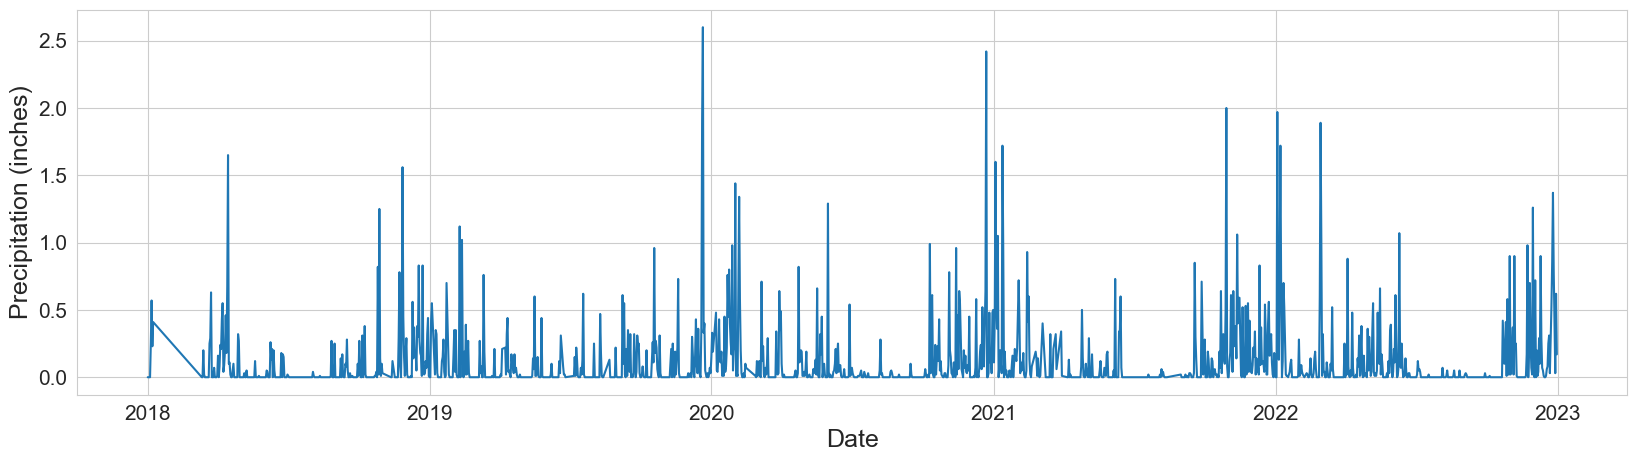

In [26]:
# Are these data appropriate for our task at hand?
# Plot daily precipitation for Seattle
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Seems to be complete and evenly distributed, except for a few null spots around 2018 and 2020 indicated by the straight lines connecting two datapoints.

No outliers observed. Distributions follow typical weather patterns observed throughout the year in Seattle.

## Check out Vancouver DF

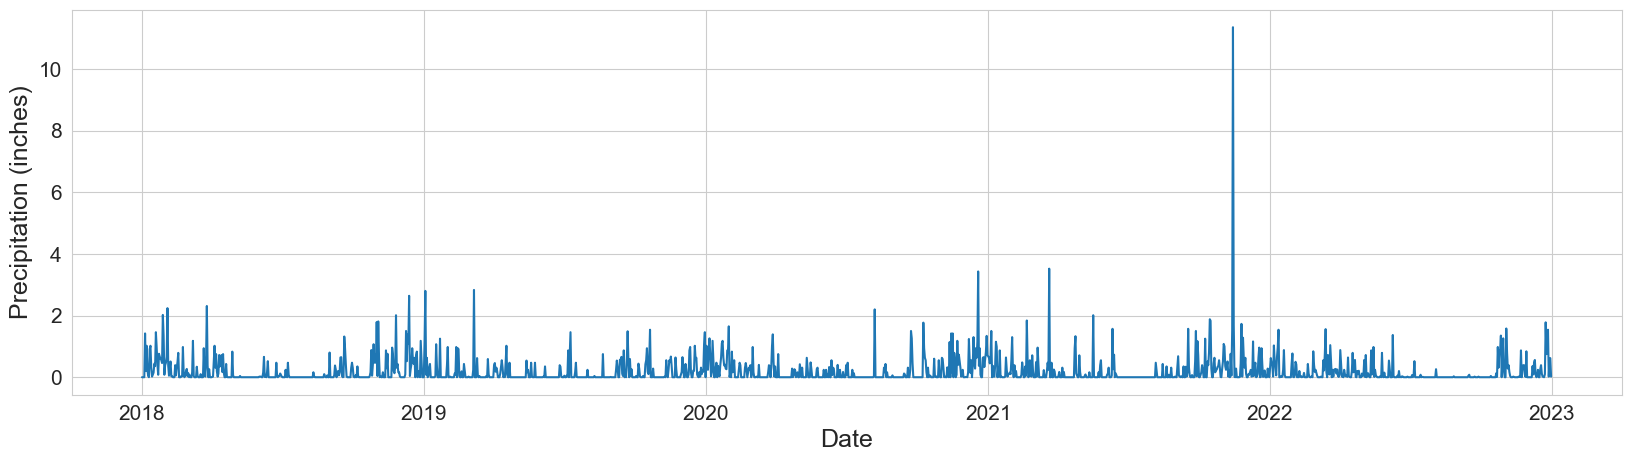

In [27]:
# Plot data for Vancouver
plt.figure(figsize=(20,5))

sns.lineplot(data=df_van, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Seems to be complete and evenly distributed, except for an obvious outlier in 2022.

Let's take care of the outlier.

In [31]:
df_van2 = df_van.drop(df_van['PRCP'].idxmax()) # dropping the max value (thank you Anaconda AI assistant)

print("original:", len(df_van))
print("no outlier:", len(df_van2)) # to verify the outlier was removed

original: 1824
no outlier: 1823


Success.

# Join SEA and VAN datasets

In [33]:
# Data are already in comparable position
# Joining the data frames
# We want to join VAN and SEA based on date and keep precipitation information for all possible dates
# This means we do an outer join

df = df_van2[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer') # Merges van2 and seattle based on date using an outer join

df.head() # Produces one data frame with date and PRCP to differentiate between x & y


,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,1.42,0.25


Let's make the dataset tidy for further wrangling and visualization.

In [34]:
# Turning into tidy dataframe with columns for city and precipitation
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

In [35]:
# How did this change the data frame?
df.head()


,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.00
4,2018-01-05,PRCP_x,1.42


We turned the data from wide format to tidy format.

Date remains the same.

SEA and VAN in city turned into PRCP_x and PRCP_y in column city. We will rename shortly.

All precipitation values are combined into one column.

## Cleaning up the now-tidy data

In [38]:
# Rename the city values
df.loc[df['city'] == 'PRCP_x', 'city'] = 'VAN' 

In [39]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [40]:
df.head()

,DATE,city,precipitation
0,2018-01-01,VAN,0.00
1,2018-01-02,VAN,0.00
2,2018-01-03,VAN,0.00
3,2018-01-04,VAN,0.00
4,2018-01-05,VAN,1.42


In [41]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


We now observe labels for each city in the "city" column. This will help with our categorical comparison.

Column names are still out of uniformity.

In [43]:
# Uniform the column names
df = df.rename(columns={'DATE': 'date'}) # changes name of column header.
df

,date,city,precipitation
0,2018-01-01,VAN,0.00
1,2018-01-02,VAN,0.00
2,2018-01-03,VAN,0.00
3,2018-01-04,VAN,0.00
4,2018-01-05,VAN,1.42
...,...,...,...
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62


Let's take care of the null values we observed earlier.

Recall we have 3652 entries.

In [44]:
# Determine the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3442 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [45]:
df.notna().sum() #how many observations are complete

date             3652
city             3652
precipitation    3442
dtype: int64

In [46]:
df.isna().sum()#how many observations are NA

date               0
city               0
precipitation    210
dtype: int64

Missing 209 precipitation values

In [49]:
# Determine number of null precipitation values for SEA and VAN

df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum() #locates where a record of city as SEA has a null precipitation value and sums it up.

np.int64(190)

In [50]:
df.loc[df['city'] == 'VAN', 'precipitation'].isna().sum() #locates where a record of city as VAN has a null precipitation value and sums it up.

np.int64(20)

We are missing 190 precipitation values in SEA and 20 in VAN.

Rather than discard them, we can impute the missing values by replacing them with means across all available years for values on that day.

In [51]:
# Design an algorithm for replacing missing values with the mean across years of values on that day.

df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year # Define a column that labels each day by the day of the year: 1, 2, ..., 365
df.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,VAN,0.00,1
1,2018-01-02,VAN,0.00,2
2,2018-01-03,VAN,0.00,3
3,2018-01-04,VAN,0.00,4
4,2018-01-05,VAN,1.42,5
5,2018-01-06,VAN,0.20,6
6,2018-01-07,VAN,1.02,7
7,2018-01-08,VAN,0.26,8
8,2018-01-09,VAN,0.05,9
9,2018-01-10,VAN,0.00,10


In [59]:
# Compute the mean precipitation for each day in Seattle, avg across years

mean_day_precipitation = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean() #apply computation

mean_day_precipitation 

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


<function matplotlib.pyplot.show(close=None, block=None)>

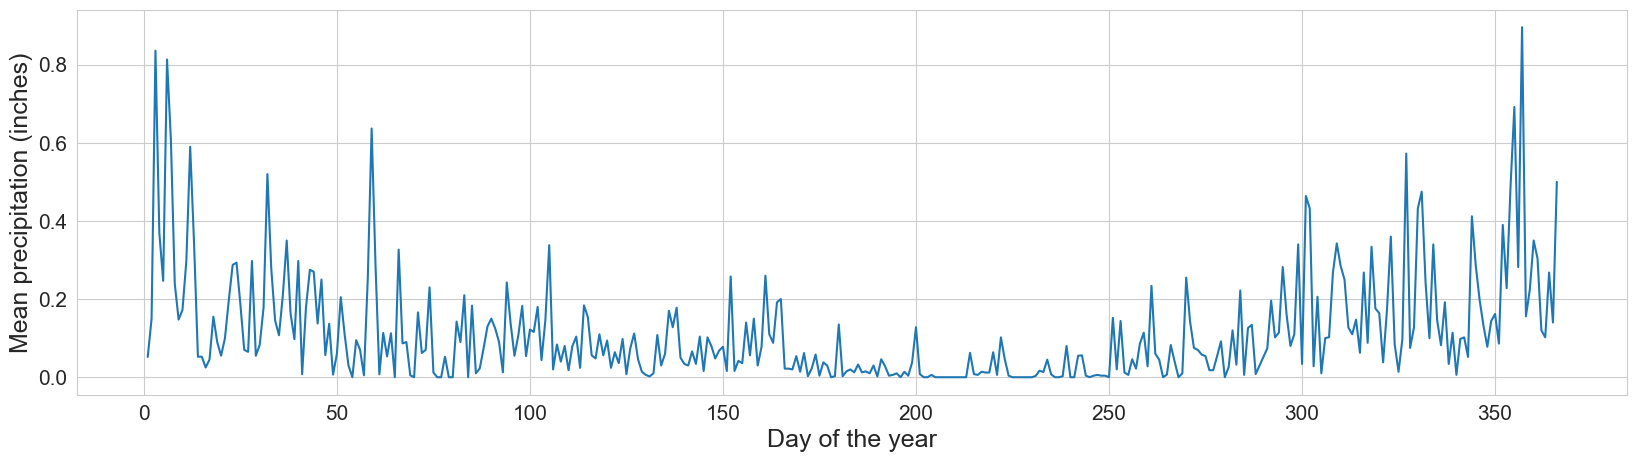

In [57]:
plt.figure(figsize=(20,5))

sns.lineplot(data=mean_day_precipitation, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show

Shows mean precipitation by day of year for Seattle.

We will later apply this to our data set where there are null values.

In [60]:
# Doing the same for Vancouver as we observed null values in that set, too

mean_day_precipitation_VAN = df.loc[
    df['city'] == 'VAN',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean() #apply computation

mean_day_precipitation_VAN

,precipitation
day_of_year,
1,0.192
2,0.682
3,0.908
4,0.268
5,0.898
...,...
362,0.350
363,0.400
364,0.526


<function matplotlib.pyplot.show(close=None, block=None)>

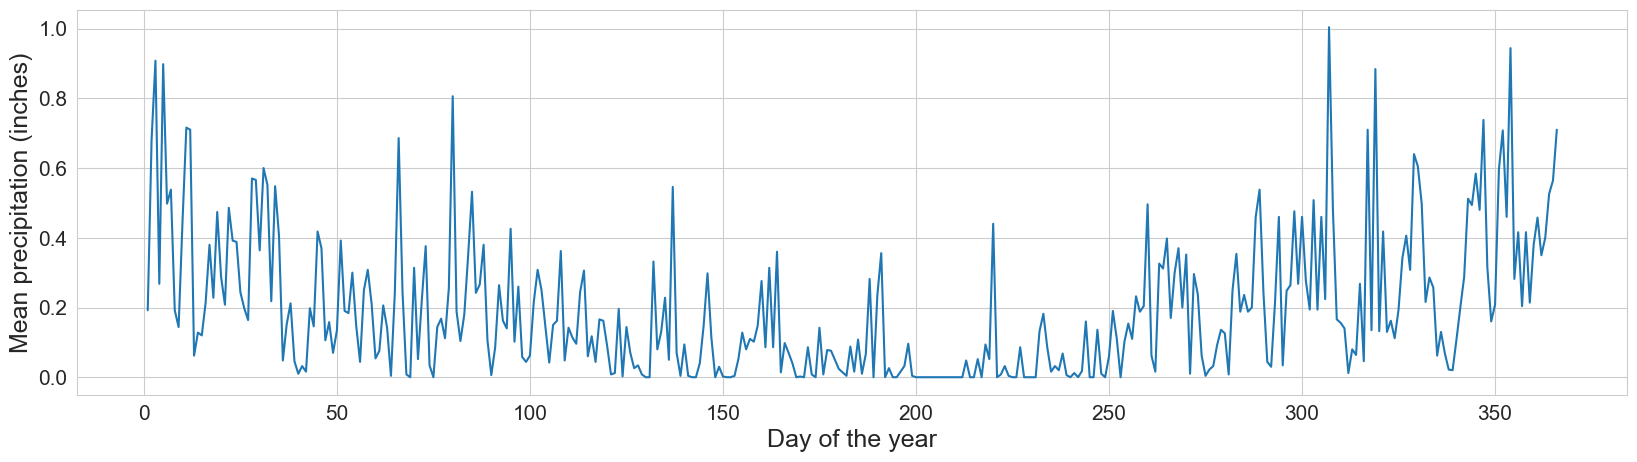

In [61]:
plt.figure(figsize=(20,5))

sns.lineplot(data=mean_day_precipitation_VAN, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show

We now observe mean precipitation in Vancouver by day of year.

Let's replace all null values with our new averages.

In [62]:
# Looking at logical comparison comparison to find index
df['precipitation'].isna()== True

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [63]:
# Get the index of each row where precipitation is missing
indices = np.where(df['precipitation'].isna() == True)[0]
indices

array([ 695,  698,  832,  853,  880,  881,  946, 1059, 1068, 1092, 1123,
       1211, 1262, 1341, 1344, 1413, 1435, 1553, 1706, 1709, 1834, 1835,
       1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846,
       1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857,
       1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868,
       1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879,
       1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133, 2134, 2135,
       2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214, 2215, 2244,
       2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362, 2363, 2368,
       2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2417, 2418,
       2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520, 2521, 2522,
       2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605, 2606, 2607,
       2608, 2609, 2610, 2611, 2612, 2818, 2819, 28

In [65]:
# Iterate over this array for Seattle
for index in indices:
    if df.loc[index, 'city'] == 'SEA':
        df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index, 'day_of_year']].values[0]

In [66]:
# Iterate over this array for Vancouver
for index in indices:
    if df.loc[index, 'city'] == 'VAN':
        df.loc[index, 'precipitation'] = mean_day_precipitation_VAN.loc[df.loc[index, 'day_of_year']].values

In [67]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

Success. No more null values.

### Exporting new data set

This is if we wanted to start our categorical analysis in a new notebook, or if we wanted to hand it off to someone else to have a clean copy.

In [68]:
# Export clean csv file
df.to_csv('clean_seattle_vancouver_weather.csv', encoding='utf-8-sig', index=False)

# Categorical EDA with graphs

In [69]:
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,VAN,0.00,1
1,2018-01-02,VAN,0.00,2
2,2018-01-03,VAN,0.00,3
3,2018-01-04,VAN,0.00,4
4,2018-01-05,VAN,1.42,5


Let's create a scatterplot.

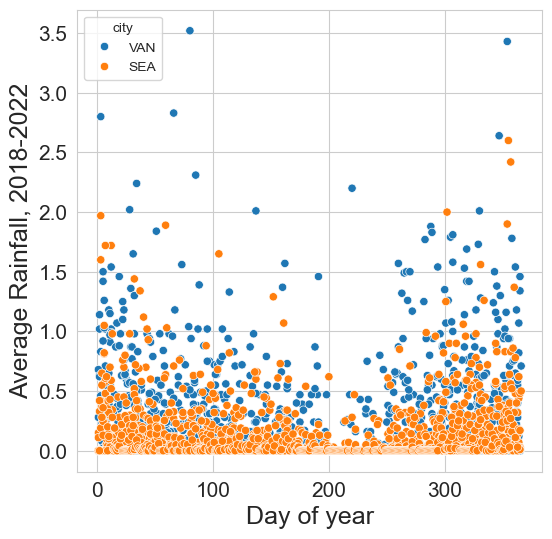

In [71]:
plt.figure(figsize=(6,6))

sns.scatterplot(data=df[df['city'].isin(['VAN', 'SEA'])],
                 x = 'day_of_year', y = 'precipitation', hue='city')

plt.xlabel('Day of year', fontsize = 18)
plt.ylabel('Average Rainfall, 2018-2022', fontsize = 18)

plt.tick_params(labelsize=15)

I don't like this. The data are too close to draw any proper conclusion from this graph.

I want to see a comparison of data over a monthly x-xis. This is cleaner and better for visualization to a non-technical audience.

In [72]:
# Creating month variable for better comparison
df['month'] = pd.DatetimeIndex(df['date']).month #Creates month column based on date column.
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

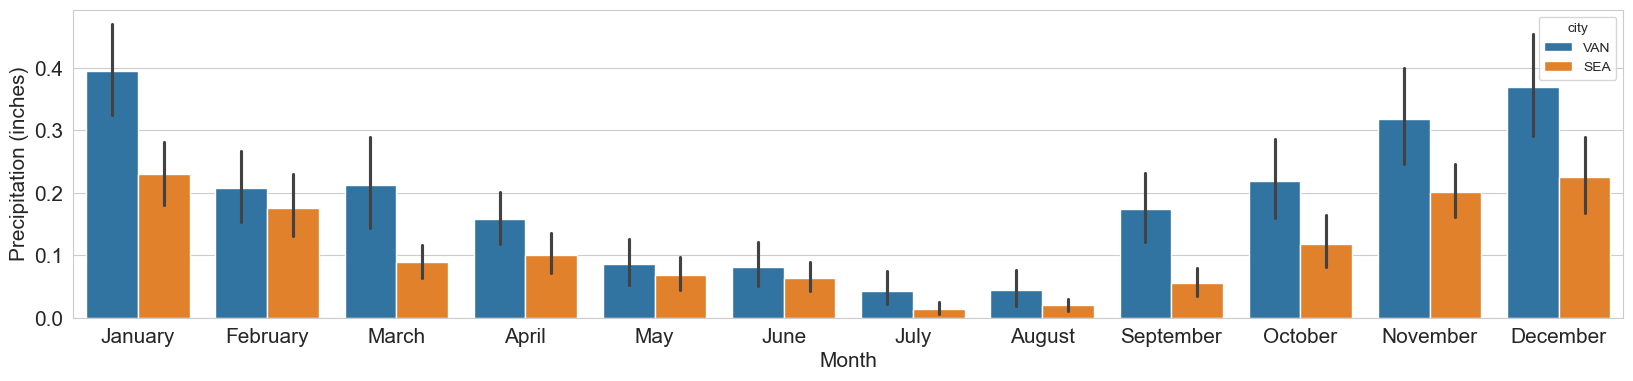

In [79]:
# Bar Graph for comparison
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

import calendar
month_names = list(calendar.month_name[1:]) # Get months
plt.xticks(ticks=range(12), labels=month_names)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

This graph shows that rainfall in Vancouver is slightly greater than Seattle, but to a rather insignificant degree. 

Let's check out the distribution.

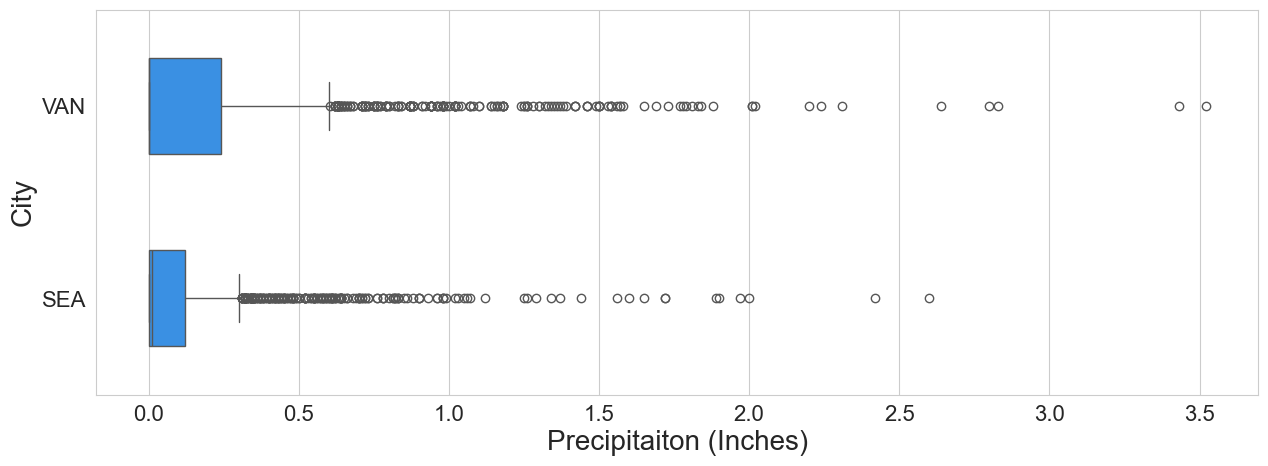

In [76]:
# Boxplot
plt.figure(figsize=(15,5))

# Data is tidy so we select the cities to compare precipitation           
sns.boxplot(data=df[df['city'].isin(['SEA', 'VAN'])],
            x ='precipitation', y = 'city', color = 'dodgerblue', width = 0.5, orient = 'h')

# Label the axes
plt.ylabel('City', fontsize = 20)
plt.xlabel('Precipitation (Inches)', fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);



This graph confirms what we have seen all along - Vancouver does see slightly more average rainfall than Seattle.

In [ ]:
I want to look more closely without outliers.

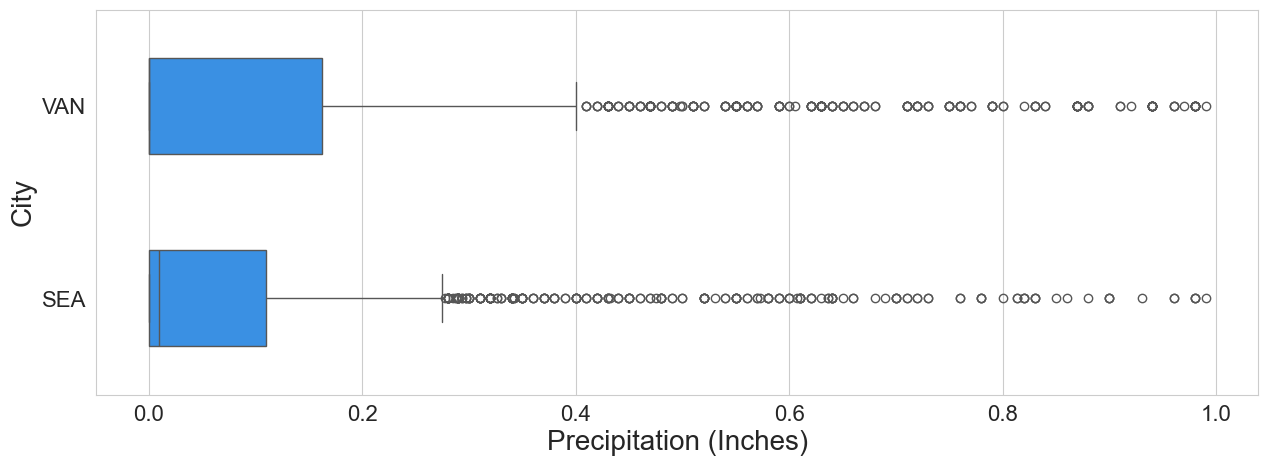

In [77]:
# Boxplot with values under 1 inch.
plt.figure(figsize=(15,5))

# Filter to SEA and VAN, and precipitation under 1 inch
df_filtered = df[(df['city'].isin(['SEA', 'VAN'])) & (df['precipitation'] < 1)]

# Boxplot
sns.boxplot(data=df_filtered,
            x='precipitation', y='city',
            color='dodgerblue', width=0.5, orient='h')

# Label the axes
plt.ylabel('City', fontsize=20)
plt.xlabel('Precipitation (Inches)', fontsize=20)

# Set tick label size
plt.tick_params(labelsize=16)

plt.show()


This confirms that Vancouver sees more average rainfall than Seattle, but to a very insignificant amount.

# Conclusion

Seattle sees less average rainfall than Vancouver, but, to an insignificant amount. 

Therefore, NCAA recruiting in Seattle and Vanoucver should focus on other distinguishing factors to set themselves apart from each other.